In [1]:
# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate

Compare the analytical cosmic ray spectrum in [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047) to the data measured in Neutrino Alley (by Yuri Efermenko).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

In [2]:
# Analytical cosmic ray flux from the paper
def dI_dpdtheta(p, theta):
    return 18/(p*np.cos(theta)+145)* (1./np.power((p+2.7/np.cos(theta)), 2.7))* (p+5)/(p+5/np.cos(theta))

In [3]:
# pBin = np.arange(1., 10000., 10.)
pBin = np.arange(1., 11., 1.)
thetaBin = np.arange(0., np.pi/2, 0.008)
p, theta = np.meshgrid(pBin, thetaBin)
f = dI_dpdtheta(p, theta)*10000

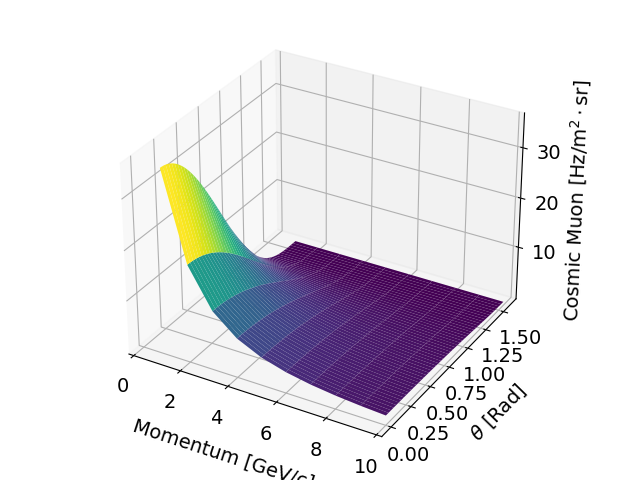

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface(p, theta, f, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\theta$ [Rad]', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Cosmic Muon [Hz/m$^2\cdot$sr]', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

ax.set_xlim( [0, 10])
plt.tight_layout(w_pad = 0.1)